In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters={
    'start':'1',
    'limit':'5000',
    'convert':'USD'
}
headers={
    'Accepts':'application/json',
    'x-CMC_PRO_API_KEY':'0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
}
session = Session()
session.headers.update(headers)
try:
    response=session.get(url, params=parameters)
    data=json.loads(response.text)
except(ConnecttionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)


C:\Users\Alen Regi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df=pd.json_normalize(data['data'])
df['Timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970041e+07,19700412,False,NaN,1,NaN,NaN,NaN,2024-05-19T14:23:00.000Z,6.713488e+04,1.685194e+10,-27.2932,0.336419,0.317539,9.651635,3.869031,4.925088,28.803239,1.322585e+12,54.6842,1.409833e+12,NaN,2024-05-19T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
1,1027,Ethereum,ETH,ethereum,8949,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201243e+08,120124343.17646,True,NaN,2,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,3.083604e+03,8.114336e+09,-31.2196,0.117421,-0.880125,5.080243,-0.160878,-7.700208,6.415510,3.704160e+11,15.3146,3.704160e+11,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
2,825,Tether USDt,USDT,tether,85862,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.114349e+11,114086550454.3862,True,NaN,3,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,1.000067e+00,3.619052e+10,-24.7463,-0.017733,-0.040067,0.039470,-0.048757,-0.010407,0.001989,1.114424e+11,4.6075,1.140942e+11,NaN,2024-05-19T14:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-19 20:00:30.562172
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475863e+08,147586322.582448,False,NaN,4,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,5.771631e+02,1.302770e+09,-9.0015,-0.217013,0.151609,-2.738174,3.165561,9.400584,64.174844,8.518138e+10,3.5217,8.518138e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.489152e+08,576325604.711286,True,NaN,5,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,1.692659e+02,2.216184e+09,-21.0263,0.421277,-2.299362,16.710409,17.379817,-2.171779,49.917364,7.598602e+10,3.1423,9.755226e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30646,Purrcoin,PURR,purrcoin,1,2024-04-15T09:19:51.000Z,"[memes, base-ecosystem]",1.000000e+09,0.000000e+00,1000000000,False,NaN,4989,1.000000e+09,1.380208e+05,NaN,2024-05-19T14:23:00.000Z,1.380208e-04,1.346042e+04,1072.6585,-0.694029,-17.658835,-41.058319,-62.012247,-32.548990,-32.548990,0.000000e+00,0.0000,1.380208e+05,NaN,2024-05-19T14:23:00.000Z,27716.0,Base,TBA,base,0xe4fcf2d991505089bbb36275570757c1f9800cb0,2024-05-19 20:00:30.562172
4996,29551,Evernode,EVR,evernode,2,2024-02-27T07:32:06.000Z,[],7.225344e+07,0.000000e+00,72253440,False,NaN,4997,2.538512e+07,6.616759e+06,NaN,2024-05-19T14:23:00.000Z,2.606550e-01,1.333951e+04,68.4433,1.079961,0.740673,-11.534015,-14.806151,-52.825014,45.636041,0.000000e+00,0.0000,1.883322e+07,NaN,2024-05-19T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
4997,11421,Marnotaur,TAUR,marnotaur,1,2021-08-26T21:44:32.000Z,[],1.500000e+08,0.000000e+00,0,False,NaN,4998,1.050000e+07,1.120820e+04,NaN,2024-05-19T14:23:00.000Z,1.067447e-03,1.332767e+04,-6.1511,-1.476196,-8.872157,-2.526362,-12.878534,-31.409228,-11.538471,0.000000e+00,0.0000,1.601171e+05,NaN,2024-05-19T14:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xF

In [25]:
def api():
    global df
    url='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters={
        'start':'1',
        'limit':'5000',
        'convert':'USD'
    }
    headers={
        'Accepts':'application/json',
        'x-CMC_PRO_API_KEY':'0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'
    }
    session = Session()
    session.headers.update(headers)
    try:
        response=session.get(url, params=parameters)
        data=json.loads(response.text)
    except(ConnecttionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df2=pd.json_normalize(data['data'])
    df2['Timestamp']=pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\Users\Alen Regi\OneDrive\Desktop\PROJECTS\FINAL PROJECTS\API.csv'):
        df.to_csv(r'C:\Users\Alen Regi\OneDrive\Desktop\PROJECTS\FINAL PROJECTS\AP.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Alen Regi\OneDrive\Desktop\PROJECTS\FINAL PROJECTS\AP.csv',mode='a',header=False)
        


In [26]:
import os
from time import time, sleep

for i in range(333):
    api()
    print('API Runner Completed')
    sleep(30) #sleep for 30 sec
exit()

API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [27]:
df5=pd.read_csv(r'C:\Users\Alen Regi\OneDrive\Desktop\PROJECTS\FINAL PROJECTS\AP.csv')
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.970041e+07,1.970041e+07,False,NaN,1,NaN,NaN,NaN,2024-05-19T14:23:00.000Z,67134.884683,1.685194e+10,-27.2932,0.336419,0.317539,9.651635,3.869031,4.925088,28.803239,1.322585e+12,54.6842,1.409833e+12,NaN,2024-05-19T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
1,1,1027,Ethereum,ETH,ethereum,8949,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201243e+08,1.201243e+08,True,NaN,2,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,3083.604454,8.114336e+09,-31.2196,0.117421,-0.880125,5.080243,-0.160878,-7.700208,6.415510,3.704160e+11,15.3146,3.704160e+11,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
2,2,825,Tether USDt,USDT,tether,85862,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.114349e+11,1.140866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,1.000067,3.619052e+10,-24.7463,-0.017733,-0.040067,0.039470,-0.048757,-0.010407,0.001989,1.114424e+11,4.6075,1.140942e+11,NaN,2024-05-19T14:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-19 20:00:30.562172
3,3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475863e+08,1.475863e+08,False,NaN,4,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,577.163115,1.302770e+09,-9.0015,-0.217013,0.151609,-2.738174,3.165561,9.400584,64.174844,8.518138e+10,3.5217,8.518138e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.489152e+08,5.763256e+08,True,NaN,5,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,169.265877,2.216184e+09,-21.0263,0.421277,-2.299362,16.710409,17.379817,-2.171779,49.917364,7.598602e+10,3.1423,9.755226e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,28749,Kira the Injective Cat,KIRA,kira-the-injective-cat,12,2023-12-19T05:10:48.000Z,"['memes', 'injective-ecosystem']",6.900000e+10,0.000000e+00,6.900000e+10,False,NaN,4996,6.900000e+10,4.796555e+06,NaN,2024-05-19T14:51:00.000Z,0.000070,1.329527e+04,26.5825,-1.231538,-1.642434,35.996173,3.331817,-55.646321,41.636589,0.000000e+00,0.0000,4.796555e+06,NaN,2024-05-19T14:51:00.000Z,7226.0,Injective,INJ,injective,factory/inj1xy3kvlr4q4wdd6lrelsrw2fk2ged0any44...,2024-05-19 20:22:38.764835
24996,24996,30543,Alien Base,ALB,alien-base,10,2024-04-11T09:25:50.000Z,['base-ecosystem'],5.100000e+08,0.000000e+00,2.433420e+08,False,NaN,4997,9.264403e+07,7.391708e+06,NaN,2024-05-19T14:50:00.000Z,0.079786,1.327526e+04,-54.7722,-2.236197,-10.946721,26.736070,93.316711,892.624379,892.624379,0.000000e+00,0.0000,4.069092e+07,NaN,2024-05-19T14:50:00.000Z,27716.0,Base,TBA,base,0x1dd2d631c92b1aCdFCDd51A0F7145A50130050C4,2024-05-19 20:22:38.764835
24997,24997,28910,Chain-key Ethereum,CKETH,chain-key-ethereum,3,2024-01-02T05:53:14.000Z,"['icp-ecosystem', 'internet-computer-ecosystem']",NaN,0.000000e+00,0.000000e+00,False,NaN,4998,NaN,NaN,NaN,2024-05-19T14:51:00.000Z,3

In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970041e+07,19700412,False,NaN,1,NaN,NaN,NaN,2024-05-19T14:23:00.000Z,67134.884683,1.685194e+10,-27.2932,0.336419,0.317539,9.651635,3.869031,4.925088,28.803239,1.322585e+12,54.6842,1.409833e+12,NaN,2024-05-19T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
1,1027,Ethereum,ETH,ethereum,8949,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201243e+08,120124343.17646,True,NaN,2,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,3083.604454,8.114336e+09,-31.2196,0.117421,-0.880125,5.080243,-0.160878,-7.700208,6.415510,3.704160e+11,15.3146,3.704160e+11,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
2,825,Tether USDt,USDT,tether,85862,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.114349e+11,114086550454.3862,True,NaN,3,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,1.000067,3.619052e+10,-24.7463,-0.017733,-0.040067,0.039470,-0.048757,-0.010407,0.001989,1.114424e+11,4.6075,1.140942e+11,NaN,2024-05-19T14:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-19 20:00:30.562172
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475863e+08,147586322.582448,False,NaN,4,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,577.163115,1.302770e+09,-9.0015,-0.217013,0.151609,-2.738174,3.165561,9.400584,64.174844,8.518138e+10,3.5217,8.518138e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.489152e+08,576325604.711286,True,NaN,5,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,169.265877,2.216184e+09,-21.0263,0.421277,-2.299362,16.710409,17.379817,-2.171779,49.917364,7.598602e+10,3.1423,9.755226e+10,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,28749,Kira the Injective Cat,KIRA,kira-the-injective-cat,12,2023-12-19T05:10:48.000Z,"[memes, injective-ecosystem]",6.900000e+10,0.000000e+00,69000000000,False,NaN,4996,6.900000e+10,4.796555e+06,NaN,2024-05-19T14:51:00.000Z,0.000070,1.329527e+04,26.5825,-1.231538,-1.642434,35.996173,3.331817,-55.646321,41.636589,0.000000e+00,0.0000,4.796555e+06,NaN,2024-05-19T14:51:00.000Z,7226.0,Injective,INJ,injective,factory/inj1xy3kvlr4q4wdd6lrelsrw2fk2ged0any44...,2024-05-19 20:22:38.764835
24996,30543,Alien Base,ALB,alien-base,10,2024-04-11T09:25:50.000Z,[base-ecosystem],5.100000e+08,0.000000e+00,243341984.39438,False,NaN,4997,9.264403e+07,7.391708e+06,NaN,2024-05-19T14:50:00.000Z,0.079786,1.327526e+04,-54.7722,-2.236197,-10.946721,26.736070,93.316711,892.624379,892.624379,0.000000e+00,0.0000,4.069092e+07,NaN,2024-05-19T14:50:00.000Z,27716.0,Base,TBA,base,0x1dd2d631c92b1aCdFCDd51A0F7145A50130050C4,2024-05-19 20:22:38.764835
24997,28910,Chain-key Ethereum,CKETH,chain-key-ethereum,3,2024-01-02T05:53:14.000Z,"[icp-ecosystem, internet-computer-ecosystem]",NaN,0.000000e+00,0,False,NaN,4998,NaN,NaN,NaN,2024-05-19T14:51:00.000Z,3118.890027,1.326586e+04,-56.2422,-0.075711,-0.7458

In [31]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19700412.00000,19700412,False,NaN,1,NaN,NaN,NaN,2024-05-19T14:23:00.000Z,67134.88468,16851938767.47191,-27.29320,0.33642,0.31754,9.65163,3.86903,4.92509,28.80324,1322584887827.72070,54.68420,1409832578343.13989,NaN,2024-05-19T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
1,1027,Ethereum,ETH,ethereum,8949,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120124343.17646,120124343.17646,True,NaN,2,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,3083.60445,8114335630.04942,-31.21960,0.11742,-0.88013,5.08024,-0.16088,-7.70021,6.41551,370415959638.35260,15.31460,370415959638.34998,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
2,825,Tether USDt,USDT,tether,85862,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111434916579.79480,114086550454.38620,True,NaN,3,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,1.00007,36190515781.17130,-24.74630,-0.01773,-0.04007,0.03947,-0.04876,-0.01041,0.00199,111442426399.71402,4.60750,114094238973.17000,NaN,2024-05-19T14:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-19 20:00:30.562172
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586322.58245,147586322.58245,False,NaN,4,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,577.16311,1302769968.38546,-9.00150,-0.21701,0.15161,-2.73817,3.16556,9.40058,64.17484,85181381617.42725,3.52170,85181381617.42999,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448915190.11433,576325604.71129,True,NaN,5,NaN,NaN,NaN,2024-05-19T14:22:00.000Z,169.26588,2216183783.44251,-21.02630,0.42128,-2.29936,16.71041,17.37982,-2.17178,49.91736,75986023288.12430,3.14230,97552258835.31000,NaN,2024-05-19T14:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-19 20:00:30.562172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,28749,Kira the Injective Cat,KIRA,kira-the-injective-cat,12,2023-12-19T05:10:48.000Z,"[memes, injective-ecosystem]",69000000000.00000,0.00000,69000000000,False,NaN,4996,69000000000.00000,4796555.34817,NaN,2024-05-19T14:51:00.000Z,0.00007,13295.27372,26.58250,-1.23154,-1.64243,35.99617,3.33182,-55.64632,41.63659,0.00000,0.00000,4796555.35000,NaN,2024-05-19T14:51:00.000Z,7226.00000,Injective,INJ,injective,factory/inj1xy3kvlr4q4wdd6lrelsrw2fk2ged0any44...,2024-05-19 20:22:38.764835
24996,30543,Alien Base,ALB,alien-base,10,2024-04-11T09:25:50.000Z,[base-ecosystem],510000000.00000,0.00000,243341984.39438,False,NaN,4997,92644033.02239,7391708.18852,NaN,2024-05-19T14:50:00.000Z,0.07979,13275.25634,-54.77220,-2.23620,-10.94672,26.73607,93.31671,892.62438,892.62438,0.00000,0.00000,40690922.59000,NaN,2024-05-19T14:50:00.000Z,27716.00000,Base,TBA,base,0x1dd2d631c92b1aCdFCDd51A0F7145A50130050C4,2024-05-19 20:22:38.764835
24997,28910,Chain-key Ethereum,CKETH,chain-key-ethereum,3,2024-01-02T05:53:14.000Z,"[icp-ecosystem, internet-computer-ecosystem]",NaN,0.00000,0,False,NaN,4998,NaN,NaN,NaN,2024-05-

In [45]:
mean_df=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d']].mean()
mean_df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
Bitcoin,-0.03491,0.26982,9.53987
Ethereum,-0.12228,-0.76222,5.15607
Tether USDt,-0.00112,-0.02975,0.03910
BNB,-0.28868,0.18784,-2.56739
Solana,-0.19022,-2.34497,16.61781
...,...,...,...
bitFloki,-1.36319,-2.66050,-25.80224
Cadence Protocol,-3.53903,-5.34032,-7.96457
Crypto Villains,29.13968,60.94430,-1.14969


In [34]:
df3=mean_df.stack()
df3

name                                                
Bitcoin                 quote.USD.percent_change_1h    -0.03491
                        quote.USD.percent_change_24h    0.26982
                        quote.USD.percent_change_7d     9.53987
Ethereum                quote.USD.percent_change_1h    -0.12228
                        quote.USD.percent_change_24h   -0.76222
                                                         ...   
Foxsy AI                quote.USD.percent_change_24h    0.47779
                        quote.USD.percent_change_7d    12.42326
Kira the Injective Cat  quote.USD.percent_change_1h    -1.23154
                        quote.USD.percent_change_24h   -1.64243
                        quote.USD.percent_change_7d    35.99617
Length: 14910, dtype: float64

In [35]:
type(df3)

pandas.core.series.Series

In [36]:
df4=df3.to_frame(name='Values')
df4

Values
name                                                        
Bitcoin                quote.USD.percent_change_1h  -0.03491
                       quote.USD.percent_change_24h  0.26982
                       quote.USD.percent_change_7d   9.53987
Ethereum               quote.USD.percent_change_1h  -0.12228
                       quote.USD.percent_change_24h -0.76222
...                                                      ...
Foxsy AI               quote.USD.percent_change_24h  0.47779
                       quote.USD.percent_change_7d  12.42326
Kira the Injective Cat quote.USD.percent_change_1h  -1.23154
                       quote.USD.percent_change_24h -1.64243
                       quote.USD.percent_change_7d  35.99617

[14910 rows x 1 columns]

In [37]:
type(df4)

pandas.core.frame.DataFrame

In [39]:
index=pd.Index(range(14910)) 
df5=df4.reset_index()
df5

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.03491
1,Bitcoin,quote.USD.percent_change_24h,0.26982
2,Bitcoin,quote.USD.percent_change_7d,9.53987
3,Ethereum,quote.USD.percent_change_1h,-0.12228
4,Ethereum,quote.USD.percent_change_24h,-0.76222
...,...,...,...
14905,Foxsy AI,quote.USD.percent_change_24h,0.47779
14906,Foxsy AI,quote.USD.percent_change_7d,12.42326
14907,Kira the Injective Cat,quote.USD.percent_change_1h,-1.23154
14908,Kira the Injective Cat,quote.USD.percent_change_24h,-1.64243


In [42]:
df6=df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.03491
1,Bitcoin,quote.USD.percent_change_24h,0.26982
2,Bitcoin,quote.USD.percent_change_7d,9.53987
3,Ethereum,quote.USD.percent_change_1h,-0.12228
4,Ethereum,quote.USD.percent_change_24h,-0.76222
...,...,...,...
14905,Foxsy AI,quote.USD.percent_change_24h,0.47779
14906,Foxsy AI,quote.USD.percent_change_7d,12.42326
14907,Kira the Injective Cat,quote.USD.percent_change_1h,-1.23154
14908,Kira the Injective Cat,quote.USD.percent_change_24h,-1.64243


In [47]:
df6['percent_change']=df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d'],['1hr','24hr','7d'])
df6

,name,percent_change,Values
0,Bitcoin,1hr,-0.03491
1,Bitcoin,24hr,0.26982
2,Bitcoin,7d,9.53987
3,Ethereum,1hr,-0.12228
4,Ethereum,24hr,-0.76222
...,...,...,...
14905,Foxsy AI,24hr,0.47779
14906,Foxsy AI,7d,12.42326
14907,Kira the Injective Cat,1hr,-1.23154
14908,Kira the Injective Cat,24hr,-1.64243


In [50]:
df7=df6.head(100)
df7

,name,percent_change,Values
0,Bitcoin,1hr,-0.03491
1,Bitcoin,24hr,0.26982
2,Bitcoin,7d,9.53987
3,Ethereum,1hr,-0.12228
4,Ethereum,24hr,-0.76222
...,...,...,...
95,Cosmos,7d,-3.45843
96,Filecoin,1hr,-0.23582
97,Filecoin,24hr,-2.48330
98,Filecoin,7d,0.95519


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

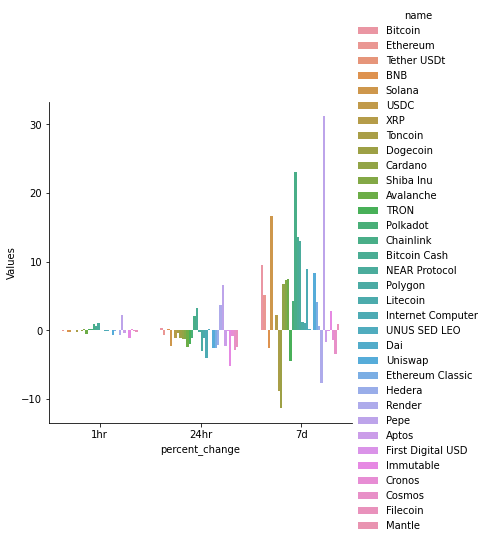

In [60]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df7, kind='bar')

In [66]:
df8=df[['name','quote.USD.price','Timestamp']]
df8=df8.query("name=='BNB'")
df8=df8.rename(columns={'quote.USD.price':'USD price'})
df8


,name,USD price,Timestamp
3,BNB,577.16311,2024-05-19 20:00:30.562172
5003,BNB,576.67360,2024-05-19 20:20:12.296285
10003,BNB,577.00669,2024-05-19 20:21:31.521890
15003,BNB,577.00669,2024-05-19 20:22:05.704248
20003,BNB,577.06608,2024-05-19 20:22:38.764835


<AxesSubplot:xlabel='Timestamp', ylabel='USD price'>

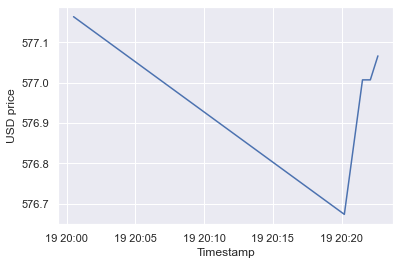

In [67]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='Timestamp', y='USD price',data=df8)
